This notebook predicts the student scores based on the number of hours studied. The source of the dataset is from kaggle : https://www.kaggle.com/datasets/samira1992/student-scores-simple-dataset/data

The implementation is from scratch and then the same is compared with sklearn library's prediction.

In [13]:
## Import required modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
## Load dataset
df = pd.read_csv('HousingData.csv')
df.describe()
# X = np.array(df['YearsExperience'])
# y = np.array(df['Salary'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


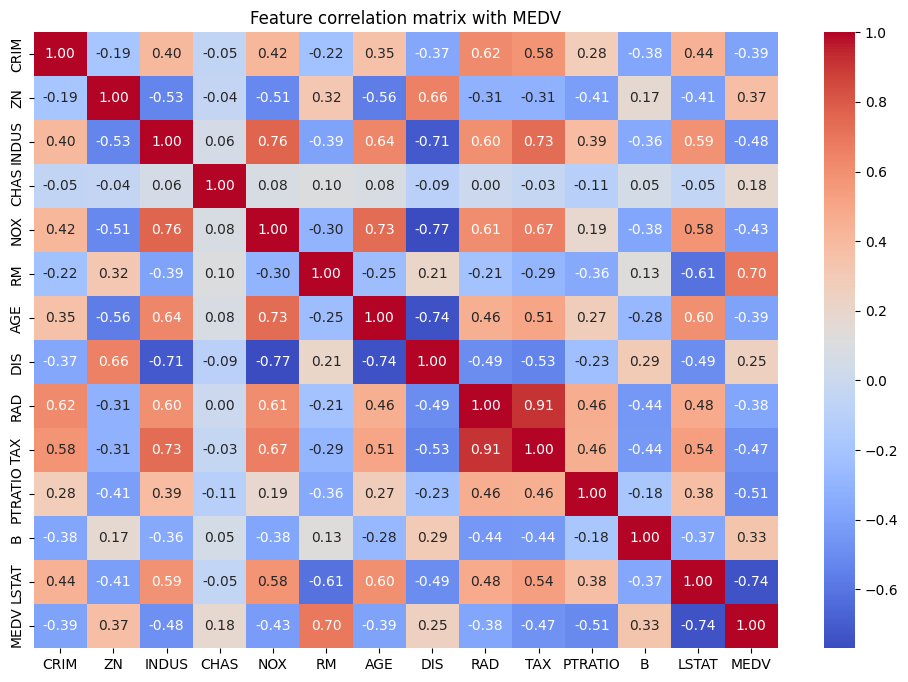

In [17]:
##Calculate correlation matrix
corr_matrix = df.corr()

# Correlation of features with target (MEDV)
target_corr = corr_matrix["MEDV"].sort_values(ascending=False)

#Plot correlation heatmap for all features
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot = True,cmap = "coolwarm",fmt=".2f")
plt.title("Feature correlation matrix with MEDV")
plt.show()

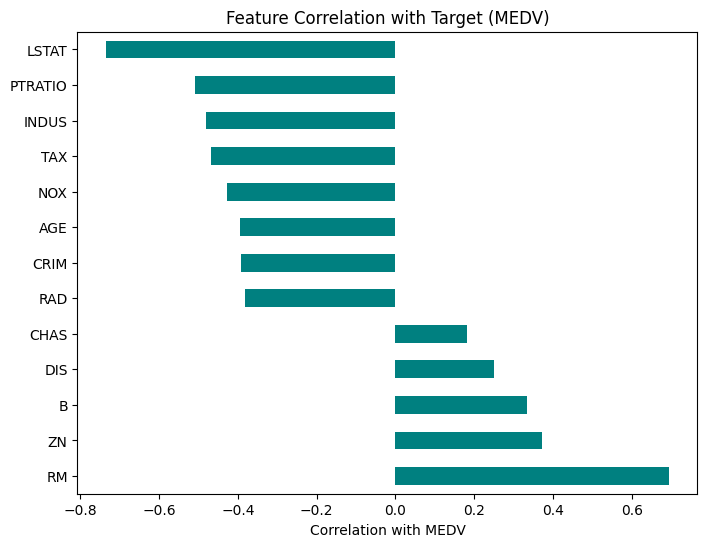

In [18]:
## Plotting correlation with target
plt.figure(figsize=(8, 6))
target_corr.drop("MEDV").plot(kind="barh", color="teal")
plt.xlabel("Correlation with MEDV")
plt.title("Feature Correlation with Target (MEDV)")
plt.show()

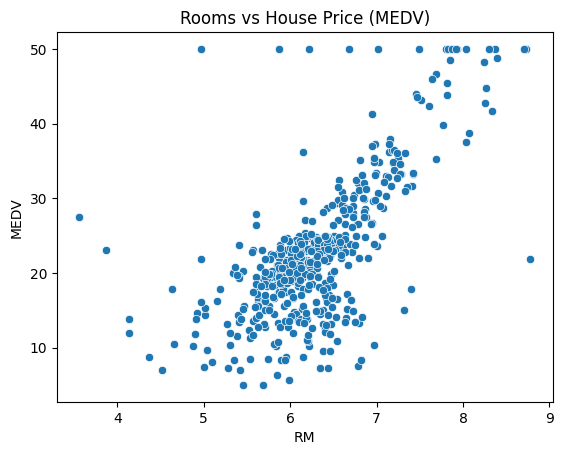

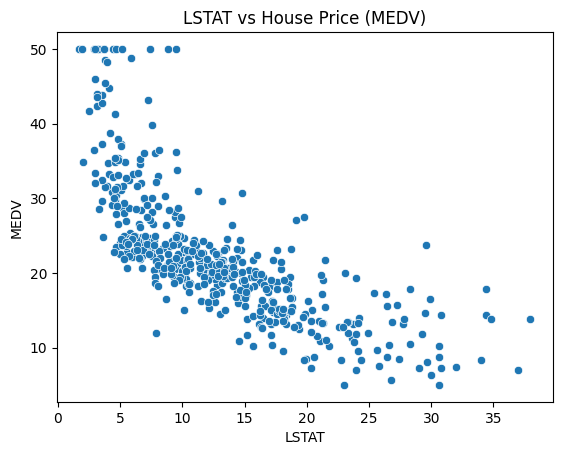

In [19]:
# Positive correlation example
sns.scatterplot(x=df["RM"], y=df["MEDV"])
plt.title("Rooms vs House Price (MEDV)")
plt.show()

# Negative correlation example
sns.scatterplot(x=df["LSTAT"], y=df["MEDV"])
plt.title("LSTAT vs House Price (MEDV)")
plt.show()


Based on the correlation of features with target column (MEDV), the desired features will be
1. RM
2. LSTAT
3. PTRATIO
4. CRIM
5. TAX
6. INDUS

In [22]:
X = df[['RM','LSTAT','PTRATIO','CRIM','TAX','INDUS']]
y = df['MEDV']

In [24]:
## Check if there is null in desired features
X.isnull().sum()

,0
RM,0
LSTAT,20
PTRATIO,0
CRIM,20
TAX,0
INDUS,20


In [48]:
## Check for Unique values
X['CRIM'].unique()
# for col in X.columns:
#   print(col,X[col].unique())

np.int64(20)

In [57]:
## Handle null values
X['LSTAT'] = X['LSTAT'].fillna(X['LSTAT'].mean())
X['CRIM'] = X['CRIM'].fillna(X['CRIM'].median())
X['INDUS'] = X['INDUS'].fillna(X['INDUS'].median())

/tmp/ipython-input-3890235693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['LSTAT'] = X['LSTAT'].fillna(X['LSTAT'].mean())
/tmp/ipython-input-3890235693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CRIM'] = X['CRIM'].fillna(X['CRIM'].median())
/tmp/ipython-input-3890235693.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,0
RM,0
LSTAT,0
PTRATIO,0
CRIM,0
TAX,0
INDUS,0


In [77]:
## Split dataset and train model
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)
mse = mean_squared_error(y_test,y_predicted)
score = model.score(X_test,y_test)
print("MSE : ",mse)
print("Score : ", score)

MSE :  16.249891027744667
Score :  0.739727802314877
